In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
%pwd

u'/Users/christophereppig/DSI_week3'

In [ ]:
%cd ~/DSI-CHI-1/lessons/week-07/1.2-k-means-lab/assets/datasets/adult.csv

In [5]:
adult = pd.read_csv('~/DSI-CHI-1/lessons/week-07/1.2-k-means-lab/assets/datasets/adult.csv')

In [6]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


In [7]:
df = adult[['occupation', 'workclass', 'education', 'capital-gain', 'sex']].copy()

In [8]:
df.head()

,occupation,workclass,education,capital-gain,sex
0,Adm-clerical,State-gov,Bachelors,2174,Male
1,Exec-managerial,Self-emp-not-inc,Bachelors,0,Male
2,Handlers-cleaners,Private,HS-grad,0,Male
3,Handlers-cleaners,Private,11th,0,Male
4,Prof-specialty,Private,Bachelors,0,Female


In [10]:
for column in df.columns:
    print column, '\t', df[column].isnull().any()

occupation 	True
workclass 	True
education 	False
capital-gain 	False
sex 	False


In [11]:
df.dtypes

occupation      object
workclass       object
education       object
capital-gain     int64
sex             object
dtype: object

In [12]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [13]:
df['occupation'].fillna("Missing Occupation", inplace=True)

In [15]:
df['occupation'].value_counts()

Prof-specialty        6172
Craft-repair          6112
Exec-managerial       6086
Adm-clerical          5611
Sales                 5504
Other-service         4923
Machine-op-inspct     3022
Missing Occupation    2809
Transport-moving      2355
Handlers-cleaners     2072
Farming-fishing       1490
Tech-support          1446
Protective-serv        983
Priv-house-serv        242
Armed-Forces            15
Name: occupation, dtype: int64

In [16]:
occupation_dummies = pd.get_dummies(df, 'occupation')

In [55]:
occupation_dummies.drop('capital-gain', axis=1, inplace=True)

occupation_dummies.head()

,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Missing Occupation,occupation_Other-service,occupation_Priv-house-serv,...,occupation_Assoc-voc,occupation_Bachelors,occupation_Doctorate,occupation_HS-grad,occupation_Masters,occupation_Preschool,occupation_Prof-school,occupation_Some-college,occupation_Female,occupation_Male
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
df['workclass'].fillna("Missing Work Class", inplace=True)
df['workclass'].value_counts()

Private               33906
Self-emp-not-inc       3862
Local-gov              3136
Missing Work Class     2799
State-gov              1981
Self-emp-inc           1695
Federal-gov            1432
Without-pay              21
Never-worked             10
Name: workclass, dtype: int64

In [28]:
def work_baby_work(job_class):
    if job_class == "Private":
        return "private"
    elif "Self-emp" in job_class:
        return "self_employed"
    elif '-gov' in job_class:
        return "government"
    else:
        return 'no_job'

In [32]:
work_class_binned = df['workclass'].apply(work_baby_work)
work_class_dummies = pd.get_dummies(work_class_binned)
work_class_dummies.head()

,government,no_job,private,self_employed
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [33]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [37]:
def education_binner(schooling):
    if schooling == "HS-grad":
        return "hs_grad"
    elif schooling in ["Some-college", 'Bachelors']:
        return 'college'
    elif schooling in ['Assoc-voc', 'Assoc-acdm', 'Prof-school']:
        return 'alt_education'
    elif schooling in ['Masters', "Doctorate"]:
        return "grad_school"
    else:
        return "lower_than_hs"

In [38]:
print education_binner("HS-grad")
print education_binner("Bachelors")
print education_binner("Banana")
print education_binner("Assoc-acdm")
print education_binner("Masters")

hs_grad
college
lower_than_hs
alt_education
grad_school


In [39]:
education_status = df['education'].apply(education_binner)
education_dummies = pd.get_dummies(education_status)
education_dummies.head()

,alt_education,college,grad_school,hs_grad,lower_than_hs
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


In [40]:
df['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [41]:
df['isMale'] = df['sex'].apply(lambda x: 1 if x=="Male" else 0)

In [42]:
df.head()

,occupation,workclass,education,capital-gain,sex,isMale
0,Adm-clerical,State-gov,Bachelors,2174,Male,1
1,Exec-managerial,Self-emp-not-inc,Bachelors,0,Male,1
2,Handlers-cleaners,Private,HS-grad,0,Male,1
3,Handlers-cleaners,Private,11th,0,Male,1
4,Prof-specialty,Private,Bachelors,0,Female,0


In [43]:
final_df = df[['capital-gain', 'isMale']].copy()

In [48]:
final_df.head()

,capital-gain,isMale,government,no_job,private,self_employed
0,2174,1,1.0,0.0,0.0,0.0
1,0,1,0.0,0.0,0.0,1.0
2,0,1,0.0,0.0,1.0,0.0
3,0,1,0.0,0.0,1.0,0.0
4,0,0,0.0,0.0,1.0,0.0


In [56]:
# final_df = final_df.join(work_class_dummies)
final_df = final_df.join(occupation_dummies)
# final_df = final_df.join(education_dummies)

In [58]:
final_df.head()

,capital-gain,isMale,government,no_job,private,self_employed,alt_education,college,grad_school,hs_grad,...,occupation_Assoc-voc,occupation_Bachelors,occupation_Doctorate,occupation_HS-grad,occupation_Masters,occupation_Preschool,occupation_Prof-school,occupation_Some-college,occupation_Female,occupation_Male
0,2174,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
def plot_graphs(x,y):
    plt.scatter(x,y)
    plt.show()

In [60]:
y = adult['income'].apply(lambda x: 0 if x=='small' else 1)

capital-gain


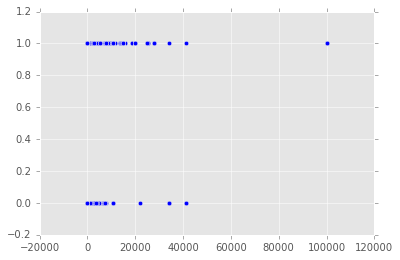

isMale


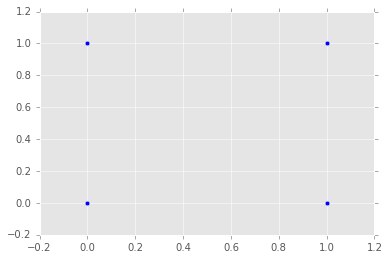

government


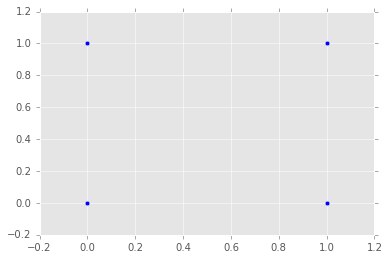

no_job


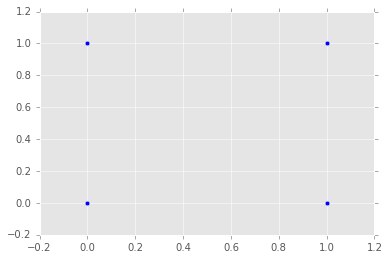

private


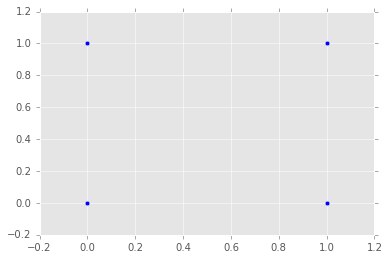

In [62]:
for x in final_df.columns[0:5]:
    print x
    plot_graphs(final_df[x],y)

In [63]:
final_df.corr()

,capital-gain,isMale,government,no_job,private,self_employed,alt_education,college,grad_school,hs_grad,...,occupation_Assoc-voc,occupation_Bachelors,occupation_Doctorate,occupation_HS-grad,occupation_Masters,occupation_Preschool,occupation_Prof-school,occupation_Some-college,occupation_Female,occupation_Male
capital-gain,1.000000,0.047094,-0.014055,-0.019277,-0.036986,0.082933,0.062744,-0.000913,0.074500,-0.046896,...,-0.008463,0.040670,0.069217,-0.046896,0.048426,-0.001922,0.168158,-0.037289,-0.047094,0.047094
isMale,0.047094,1.000000,-0.038532,-0.063628,-0.033845,0.137274,-0.000375,-0.034674,0.020897,0.012617,...,-0.010977,0.021529,0.033300,0.012617,0.006873,0.003713,0.048505,-0.059765,-1.000000,1.000000
government,-0.014055,-0.038532,1.000000,-0.097591,-0.592890,-0.140995,0.011255,0.043348,0.154540,-0.070072,...,-0.004887,0.059667,0.056110,-0.070072,0.142725,-0.008941,0.005646,-0.002395,0.038532,-0.038532
no_job,-0.019277,-0.063628,-0.097591,1.000000,-0.373662,-0.088861,-0.024101,0.000490,-0.036342,-0.016593,...,-0.015875,-0.050133,-0.013126,-0.016593,-0.033597,0.011044,-0.016453,0.045222,0.063628,-0.063628
private,-0.036986,-0.033845,-0.592890,-0.373662,1.000000,-0.539849,-0.028761,-0.025948,-0.110145,0.068865,...,0.012656,-0.032131,-0.060551,0.068865,-0.091788,0.005806,-0.074761,-0.001760,0.033845,-0.033845
self_employed,0.082933,0.137274,-0.140995,-0.088861,-0.539849,1.000000,0.047387,-0.009225,0.020724,-0.012522,...,-0.001440,0.019481,0.037306,-0.012522,0.004748,-0.006956,0.114526,-0.028149,-0.137274,0.137274
alt_education,0.062744,-0.000375,0.011255,-0.024101,-0.028761,0.047387,1.000000,-0.253007,-0.085027,-0.220017,...,0.659202,-0.141185,-0.035330,-0.220017,-0.076371,-0.013137,0.413943,-0.170441,0.000375,-0.000375
college,-0.000913,-0.034674,0.043348,0.000490,-0.025948,-0.009225,-0.253007,1.000000,-0.212185,-0.549056,...,-0.166783,0.558027,-0.088166,-0.549056,-0.190586,-0.032784,-0.104730,0.673662,0.034674,-0.034674
grad_school,0.074500,0.020897,0.154540,-0.036342,-0.110145,0.020724,-0.085027,-0.212185,1.000000,-0.184518,...,-0.056050,-0.118405,0.415513,-0.184518,0.898207,-0.011017,-0.035196,-0.142941,-0.020897,0.020897
hs_grad,-0.046896,0.012617,-0.070072,-0.016593,0.068865,-0.012522,-0.220017,-0.549056,-0.184518,1.000000,...,-0.145036,-0.306388,-0.076670,1.000000,-0.165736,-0.028509,-0.091074,-0.369878,-0.012617,0.012617


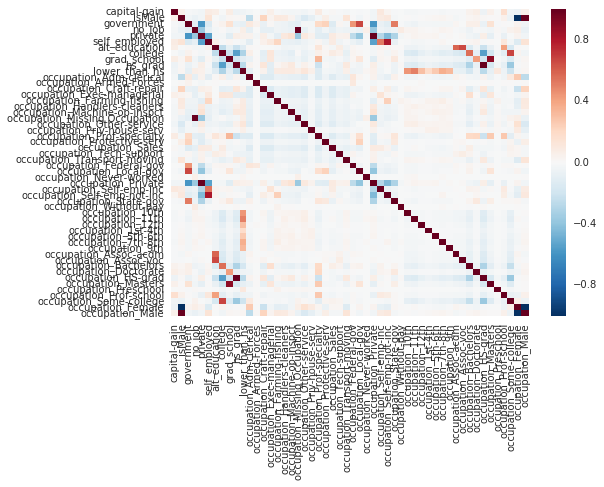

In [65]:
import seaborn as sns
sns.heatmap(final_df.corr())

In [66]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(final_df)

In [69]:
x.shape

(48842, 52)

In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

In [71]:
kmeans.fit(x)
predictions = kmeans.predict(x)

In [73]:
final_df = final_df.join(pd.DataFrame(predictions, columns=['two_classes']))

In [74]:
final_df.head()

,capital-gain,isMale,government,no_job,private,self_employed,alt_education,college,grad_school,hs_grad,...,occupation_Bachelors,occupation_Doctorate,occupation_HS-grad,occupation_Masters,occupation_Preschool,occupation_Prof-school,occupation_Some-college,occupation_Female,occupation_Male,two_classes
0,2174,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [83]:
final_df.groupby('two_classes')[['alt_education', 'college', 'grad_school', 'hs_grad', 'lower_than_hs']].count().reset_index()


,two_classes,alt_education,college,grad_school,hs_grad,lower_than_hs
0,0,36736,36736,36736,36736,36736
1,1,12106,12106,12106,12106,12106


In [82]:
final_df.groupby('two_classes')[['government']].count().reset_index()



,two_classes,government
0,0,36736
1,1,12106


In [87]:
data_frame_of_classes = pd.DataFrame(y).join(final_df['two_classes'])
data_frame_of_classes.head()

,income,two_classes
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [88]:
data_frame_of_classes.corr()

,income,two_classes
income,1.000000,0.076456
two_classes,0.076456,1.000000


In [89]:
data_frame_of_classes.describe()

,income,two_classes
count,48842.000000,48842.000000
mean,0.493878,0.247860
std,0.499968,0.431847
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [90]:
data_frame_of_classes.loc[(data_frame_of_classes)]

ValueError: Cannot index with multidimensional key

In [92]:
adult['income'].value_counts()

small    24720
large     7841
Name: income, dtype: int64

In [94]:
adult.shape

(48842, 15)

In [96]:
kmeans = KMeans(3)
kmeans.fit(x)
predictions = kmeans.predict(x)

In [97]:
final_df = final_df.join(pd.DataFrame(predictions, columns=['three_classes']))


In [99]:
final_df.groupby('three_classes')['isMale'].mean()

three_classes
0    0.848839
1    0.622385
2    0.649417
Name: isMale, dtype: float64

In [100]:
final_df.groupby('three_classes')['college'].mean()

three_classes
0    0.374483
1    0.440678
2    0.379355
Name: college, dtype: float64

In [101]:
final_df['three_classes'].value_counts()

2    36736
1     6549
0     5557
Name: three_classes, dtype: int64

In [105]:
final_df.groupby('three_classes')['capital-gain'].mean()

three_classes
0    2803.884110
1     812.901970
2     865.607088
Name: capital-gain, dtype: float64

In [106]:
sns.distplot(final_df['capital-gain'], by=final_df['three_classes'])

TypeError: distplot() got an unexpected keyword argument 'by'

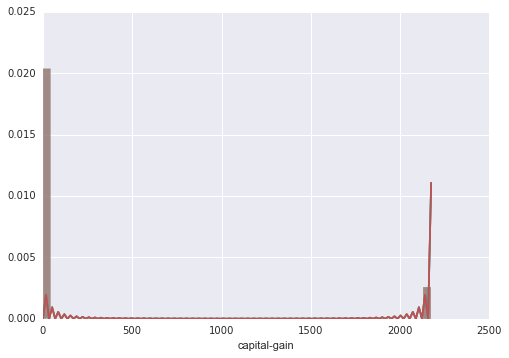

In [109]:
for classes in [0,1,2]:
    sns.distplot(final_df.loc[(final_df['three_classes']), 'capital-gain'])
